In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
sns.set_style('darkgrid')

In [421]:
frame = pd.read_csv('ntp_stat_vm.csv')

In [422]:
frame = frame[['Time','Offset']]

In [423]:
frame.head()

,Time,Offset
0,20:23:33,0.000849
1,20:23:34,-0.000740
2,20:23:36,0.000002
3,20:23:37,-0.000368
4,20:23:38,0.000238


In [424]:
frame['Time'] = pd.to_datetime(frame['Time']).apply(lambda x: x.time())

In [425]:
x = frame.Offset.mean()
x = [x] * frame.size
s2 = pd.Series(x)

In [426]:
frame.insert(2,"Average",s2,True)

In [427]:
frame.set_index('Time',inplace=True)
frame.head()

,Offset,Average
Time,,
20:23:33,0.000849,0.000203
20:23:34,-0.000740,0.000203
20:23:36,0.000002,0.000203
20:23:37,-0.000368,0.000203
20:23:38,0.000238,0.000203


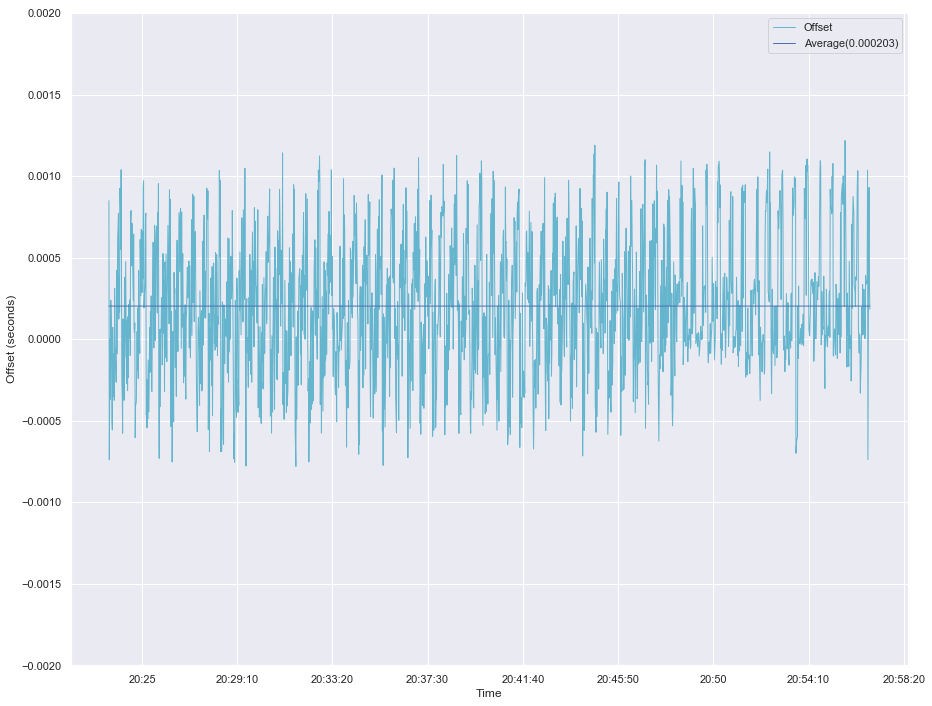

In [434]:
ax = frame.plot(figsize=(15,12),linewidth=1,fontsize=11,ylim=(-0.002,0.002),color=['c','b'])
ax.set(xlabel="Time", ylabel="Offset (seconds)")
ax.legend(['Offset', 'Average({0:.6f})'.format(frame.Average[0])])
plt.savefig('figure_vm.png')

In [436]:
frame = pd.read_csv('ntp_stat_5g.csv')
frame = frame[['Time','Offset']]
frame['Time'] = pd.to_datetime(frame['Time']).apply(lambda x: x.time())

In [437]:
frame.head()

,Time,Offset
0,16:27:08.397613,+0.002
1,16:27:09.442615,+0.000
2,16:27:10.493034,+0.007
3,16:27:11.526923,+0.001
4,16:27:12.562271,+0.001


In [438]:
frame = frame[frame.Offset != 'no']

In [439]:
frame['Offset'] = frame['Offset'].apply(lambda x: float(x))
frame.size

3598

In [440]:
x = frame.Offset.mean()
x = [x] * frame.size
s2 = pd.Series(x)

In [441]:
frame.insert(2,"Average",s2,True)
frame.head()

,Time,Offset,Average
0,16:27:08.397613,0.002,-0.000548
1,16:27:09.442615,0.000,-0.000548
2,16:27:10.493034,0.007,-0.000548
3,16:27:11.526923,0.001,-0.000548
4,16:27:12.562271,0.001,-0.000548


In [442]:
frame.set_index('Time',inplace=True)

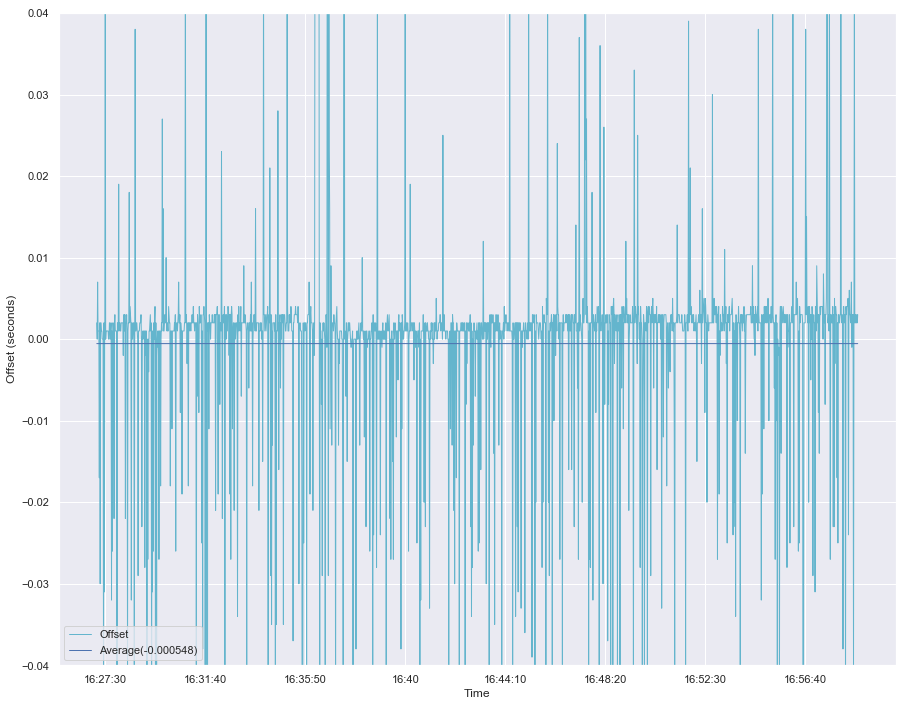

In [443]:
ax = frame.plot(figsize=(15,12),linewidth=1,fontsize=11,ylim=(-0.04,0.04),color=['c','b'])
ax.set(xlabel="Time", ylabel="Offset (seconds)")
ax.legend(['Offset', 'Average({0:.6f})'.format(frame.Average[0])])
plt.savefig('figure_5g.png')